# Data Loading

In [1]:
# Imports
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Beispiel, wie eine CSV-Datei geladen wird
csv_file_path = '../Data/Telco_customer_churn.xlsx'

try:
    data = pd.read_csv(csv_file_path)
    print("File read successfully as a CSV file.")
    
    # Check the shape of your data
    print("Shape of the data:", data.shape)
    
    # Display the first few rows of the data
    print(data.head(10))
    
except FileNotFoundError:
    print(f"The file at {csv_file_path} was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An unexpected error occurred while reading the file: {e}")

File read successfully as a CSV file.
Shape of the data: (7043, 32)
   Count  Country  State  City  Zip Code  Lat Long   Latitude   Longitude  \
0    1.0        0      0   562   90003.0       327  33.964131 -118.272783   
1    1.0        0      0   562   90005.0       405  34.059281 -118.307420   
2    1.0        0      0   562   90006.0       393  34.048013 -118.293953   
3    1.0        0      0   562   90010.0       410  34.062125 -118.315709   
4    1.0        0      0   562   90015.0       385  34.039224 -118.266293   
5    1.0        0      0   562   90020.0       416  34.066367 -118.309868   
6    1.0        0      0   562   90022.0       367  34.023810 -118.156582   
7    1.0        0      0   562   90024.0       415  34.066303 -118.435479   
8    1.0        0      0   562   90028.0       447  34.099869 -118.326843   
9    1.0        0      0   562   90029.0       440  34.089953 -118.294824   

   Gender  Senior Citizen  ...  Contract  Paperless Billing  Payment Method  \
0    

# Data Cleaning and Feature Engineering

In [2]:
# Data Cleaning and Feature Engineering
# Check for missing values
print(data.isnull().sum())

# Data types and basic info
print(data.info())


Count                      0
Country                    0
State                      0
City                       0
Zip Code                   0
Lat Long                   0
Latitude                   0
Longitude                  0
Gender                     0
Senior Citizen             0
Partner                    0
Dependents                 0
Tenure Months              0
Phone Service              0
Multiple Lines             0
Internet Service           0
Online Security            0
Online Backup              0
Device Protection          0
Tech Support               0
Streaming TV               0
Streaming Movies           0
Contract                   0
Paperless Billing          0
Payment Method             0
Monthly Charges            0
Total Charges              0
Churn Label                0
Churn Value                0
Churn Score                0
CLTV                       0
TotalCharges_per_Month    11
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entr

In [3]:
# Handling missing values
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

In [4]:

# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(include=[object]).columns.tolist()

In [5]:
# Clean columns 'Monthly Charges' and 'Total Charges'
data['Monthly Charges'] = data['Monthly Charges'].replace(" ", np.nan).astype(float)
data['Total Charges'] = data['Total Charges'].replace(" ", np.nan).astype(float)

In [6]:
# Fill missing values for numerical columns with median
imputer_num = SimpleImputer(strategy='median')
data[numerical_columns] = imputer_num.fit_transform(data[numerical_columns])

In [7]:
# Encoding categorical variables
le = LabelEncoder()
for column in categorical_columns:
    if column not in ['CustomerID', 'Churn Reason']:
        data[column] = le.fit_transform(data[column])

In [8]:
# Feature engineering
# Prevent division by zero by replacing zeroes with NaN in 'Tenure Months'
data['Tenure Months'] = data['Tenure Months'].replace(0, np.nan)
data['TotalCharges_per_Month'] = data['Total Charges'] / data['Tenure Months']



In [9]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [10]:
# Impute remaining missing values
data[numerical_columns] = imputer_num.fit_transform(data[numerical_columns])

In [11]:
# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'TotalCharges_per_Month']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [12]:
# Dropping unnecessary columns
data.columns


Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'TotalCharges_per_Month'],
      dtype='object')

In [13]:
# Ensure no NaN values remain in the data
print(data.isnull().sum())


Count                     0
Country                   0
State                     0
City                      0
Zip Code                  0
Lat Long                  0
Latitude                  0
Longitude                 0
Gender                    0
Senior Citizen            0
Partner                   0
Dependents                0
Tenure Months             0
Phone Service             0
Multiple Lines            0
Internet Service          0
Online Security           0
Online Backup             0
Device Protection         0
Tech Support              0
Streaming TV              0
Streaming Movies          0
Contract                  0
Paperless Billing         0
Payment Method            0
Monthly Charges           0
Total Charges             0
Churn Label               0
Churn Value               0
Churn Score               0
CLTV                      0
TotalCharges_per_Month    0
dtype: int64


# Explorative Datenanalyse (EDA)

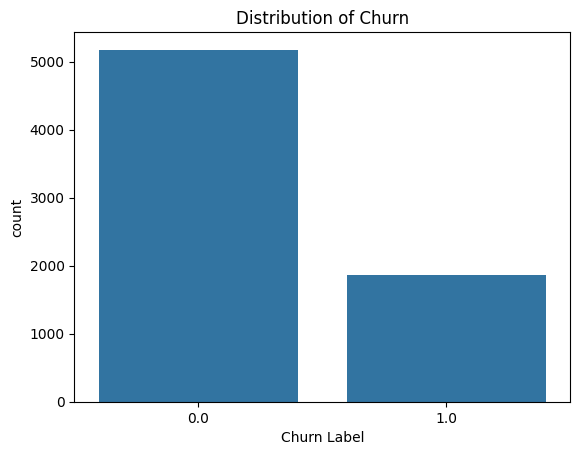

In [14]:
# Distribution of the target variable
sns.countplot(x='Churn Label', data=data)
plt.title('Distribution of Churn')
plt.show()


In [ ]:
# Pairplot to visualize relationships
sns.pairplot(data, hue='Churn Label', diag_kind='kde')
plt.show()
